# A사 물류센터 출고물량 예측 (Facebook Prophet ) 



# STEP #0: 데이터셋

A사 물류센터 출고 정보

출처 : 

물류센터 출고 정보에 대한 데이터
- 2021년 01월 04일 ~ 2022년 05월 25일의 물류센터에서 출고 한 정보



# STEP #1: 데이터 준비

### Prophet 라이브러리

- install : 
     pip install fbprophet
     
- 위 에러 발생시 : 
    conda install -c conda-forge fbprophet
 

- 레퍼런스 : https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#실행 후 코랩(Colab)의 런타임을 재시작 합니다.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,450 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
# import libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
#matplotlib의 폰트를 Nanum 폰트로 지정합니다.
plt.rc('font', family='NanumBarunGothic')
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
# 데이터 읽기
df =  pd.read_csv('data/ap_os_b2b_out(ansi).csv', encoding='CP949',index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,date,cust_cd,cust_nm,item_cd,item_nm,qty
0,2021-01-04,11088038,아리따움 NC야탑점,111131790,아이오페 슈퍼 바이탈 에센셜 소프너 150ML (20),6
1,2021-01-04,11008786,아리따움 성남(구)시청점,190010526,아리따움 샤워타월 1EA (17AD),1
2,2021-01-04,11007426,아리따움 분당 이매점,190010765,아리따움 아이래쉬컬링뷰러 1EA (17AD),3
3,2021-01-04,11009147,아리따움 분당 야탑점,110651205,마몽드 로즈워터토너 18AD 500ML,2
4,2021-01-04,11007426,아리따움 분당 이매점,170011674,아리따움 아이돌래쉬 속눈썹풀 투명(AD),4
...,...,...,...,...,...,...
442003,2022-05-02,11055282,광진(방),111174208,설화수 윤조마스크EX 5매 (22AD 1코드),2
442004,2022-05-02,11000285,영일(방),111174208,설화수 윤조마스크EX 5매 (22AD 1코드),3
442005,2022-05-02,S50366,완도(영),111174208,설화수 윤조마스크EX 5매 (22AD 1코드),1
442006,2022-05-02,11084758,롯데미아 통합,111174208,설화수 윤조마스크EX 5매 (22AD 1코드),3


# STEP #2: EDA(Exploratory Data Analysis) :  탐색적 데이터 분석

In [ ]:
df.describe()

,qty
count,1.102519e+07
mean,1.650320e+01
std,7.347982e+01
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,5.000000e+00
max,3.000000e+04


In [ ]:
df.isna().sum()

date       0
cust_cd    0
cust_nm    0
item_cd    0
item_nm    0
qty        0
dtype: int64

In [ ]:
df.head()

,date,cust_cd,cust_nm,item_cd,item_nm,qty
0,2021-01-04,11088038,아리따움 NC야탑점,111131790,아이오페 슈퍼 바이탈 에센셜 소프너 150ML (20),6
1,2021-01-04,11008786,아리따움 성남(구)시청점,190010526,아리따움 샤워타월 1EA (17AD),1
2,2021-01-04,11007426,아리따움 분당 이매점,190010765,아리따움 아이래쉬컬링뷰러 1EA (17AD),3
3,2021-01-04,11009147,아리따움 분당 야탑점,110651205,마몽드 로즈워터토너 18AD 500ML,2
4,2021-01-04,11007426,아리따움 분당 이매점,170011674,아리따움 아이돌래쉬 속눈썹풀 투명(AD),4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11025190 entries, 0 to 442007
Data columns (total 6 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   date     object
 1   cust_cd  object
 2   cust_nm  object
 3   item_cd  object
 4   item_nm  object
 5   qty      int64 
dtypes: int64(1), object(5)
memory usage: 588.8+ MB


### 거래처수, 제품수, 일자 min, max, 수량 min, max, sum

In [ ]:
df['cust_cd'].nunique()

4823

In [ ]:
sorted(df['cust_cd'].unique())

In [ ]:
df['item_cd'].nunique()

13919

In [ ]:
df['date'].min()

'2021-01-04'

In [ ]:
df['date'].max()

'2022-05-25'

In [ ]:
df['qty'].max()

30000

In [ ]:
df['qty'].min()

1

In [ ]:
sorted(df.loc[df['qty']>=3000,'cust_nm'].unique())

['AMORE STORE',
 '●B2C 통합고객(AMORE MALL팀)',
 '●B2C 통합고객(AP Mall팀)',
 '●B2C 통합고객(e커머스 영업1팀)',
 '●B2C 통합고객(e커머스 영업2팀)',
 '●B2C 통합고객(e커머스 영업3팀)',
 '●뷰티포인트',
 '세종씨앤피(잡출처)',
 '아모레 성수',
 '아모레 스토어 광교',
 '오산',
 '진보커뮤니케이션(부천)']

In [ ]:
sorted(df.loc[df['cust_nm'].str.contains('●'),'cust_nm'].unique())

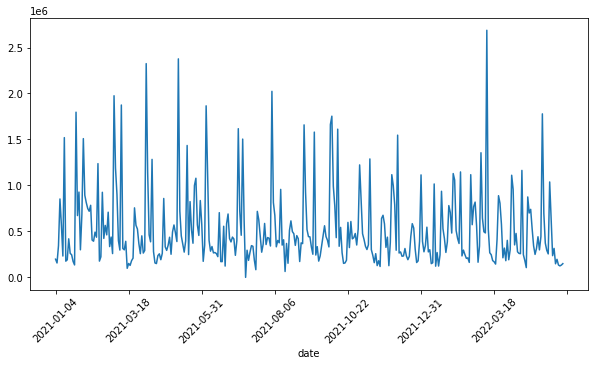

In [ ]:
#날짜별로 출고수량이 어떻게 변하는지 간단하게 확인
#데이터프레임 plot
plt.figure(figsize=(10,5))
(df.groupby('date')['qty'].sum()).plot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
#거처래별 출고수량 확인
df_cust=pd.DataFrame(df.groupby('cust_nm')['qty'].sum())
df_cust.reset_index(inplace=True)
df_cust.sort_values('qty', ascending=False, inplace=True)

In [ ]:
df_cust

,cust_nm,qty
3020,오산,919134
729,●B2C통합창고(화장품),820014
736,●아리따움 온라인쇼핑몰,647761
1024,동백(방),546680
836,광주신창(방),404553
...,...,...
3099,올리브영 계양점 (잡출처),1
373,CJ올리브영 현대아울렛가산점(잡,1
371,CJ올리브영 합정메세나폴리스(잡,1
3103,올리브영 고양원당점,1


In [ ]:
import altair as alt
import plotly.express as px

# plotlt의 bar차트
px.bar(df_cust, x='cust_nm', y='qty')

In [ ]:
#제품별 출고수량 확인
df_item=pd.DataFrame(df.groupby('item_nm')['qty'].sum())
df_item.reset_index(inplace=True)
df_item.sort_values('qty', ascending=False, inplace=True)

In [ ]:
df_item

,item_nm,qty
3404,설화수 윤조에센스 퍼펙팅 (20) 파 1회용,5964924
3579,설화수 자음생크림 퍼펙팅 (파 1회용 (방(20),4538088
7351,헤라 에이지 어웨이 에스테틱 BX83 리포솜 (파,4310864
3722,설화수 진설에센스(파 1회용(19년 BI변경,3801348
7345,헤라 에이지 어웨이 에스테틱 BX 아이크림 (파,3723037
...,...,...
1302,땡큐파머 선프로젝트워터선크림 50ML,1
1316,라네즈 G6 포장 리본(블루) 1EA 22.04 공용,1
1366,라네즈 네오 쿠션_글로우 13N 아이보리15G*2_면),1
1372,라네즈 네오 쿠션_매트 13N 듀오 30g*2_면)DutyFree,1


In [ ]:
import altair as alt
import plotly.express as px

# plotlt의 bar차트
px.bar(df_item, x='item_nm', y='qty')

In [ ]:
#월단위 출고수량 확인
#타임시리즈 resample 사용해 보자.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11025190 entries, 0 to 442007
Data columns (total 6 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   date     object
 1   cust_cd  object
 2   cust_nm  object
 3   item_cd  object
 4   item_nm  object
 5   qty      int64 
dtypes: int64(1), object(5)
memory usage: 588.8+ MB


In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['date64']=df['date']

In [ ]:
df.set_index('date64',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11025190 entries, 2021-01-04 to 2022-05-02
Data columns (total 6 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   cust_cd  object        
 2   cust_nm  object        
 3   item_cd  object        
 4   item_nm  object        
 5   qty      int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 588.8+ MB


In [ ]:
df.head()

,date,cust_cd,cust_nm,item_cd,item_nm,qty
date64,,,,,,
2021-01-04,2021-01-04,11088038,아리따움 NC야탑점,111131790,아이오페 슈퍼 바이탈 에센셜 소프너 150ML (20),6
2021-01-04,2021-01-04,11008786,아리따움 성남(구)시청점,190010526,아리따움 샤워타월 1EA (17AD),1
2021-01-04,2021-01-04,11007426,아리따움 분당 이매점,190010765,아리따움 아이래쉬컬링뷰러 1EA (17AD),3
2021-01-04,2021-01-04,11009147,아리따움 분당 야탑점,110651205,마몽드 로즈워터토너 18AD 500ML,2
2021-01-04,2021-01-04,11007426,아리따움 분당 이매점,170011674,아리따움 아이돌래쉬 속눈썹풀 투명(AD),4


In [ ]:
df_month=df.resample('W-Mon').sum()

In [ ]:
df_month.reset_index(inplace=True)

In [ ]:
# plotlt의 bar차트
px.bar(df_month, x='date64', y='qty')

In [ ]:
import calendar
import datetime

#해당 일자의 월의 마지막 날짜
def GetMonthLastDate(sourDate):
    #date = datetime(year=year, month=month, day=1).date()
    monthrange = calendar.monthrange(sourDate.year, sourDate.month)
    first_day = calendar.monthrange(sourDate.year, sourDate.month)[0]
    last_day = calendar.monthrange(sourDate.year, sourDate.month)[1]
    last_date = sourDate.replace(day=last_day)
    return last_date

#해당 일자의 주차의 일요일 날짜 기준
def GetWeekLastDate(sourceDate):
    #temporaryDate = datetime.datetime(sourceDate.year, sourceDate.month, sourceDate.day)
    #weekDayCount = temporaryDate.weekday()
    weekDayCount = sourceDate.weekday()
    targetDate = sourceDate + datetime.timedelta(days =  -weekDayCount + 6)
    #targetDate = AddDays(sourceDate, -weekDayCount + 6);
    return targetDate

In [ ]:
df['weekly']=df['date'].apply(GetWeekLastDate)

In [ ]:
df.head()

,date,cust_cd,cust_nm,item_cd,item_nm,qty,weekly
date64,,,,,,,
2021-01-04,2021-01-04,11088038,아리따움 NC야탑점,111131790,아이오페 슈퍼 바이탈 에센셜 소프너 150ML (20),6,2021-01-10
2021-01-04,2021-01-04,11008786,아리따움 성남(구)시청점,190010526,아리따움 샤워타월 1EA (17AD),1,2021-01-10
2021-01-04,2021-01-04,11007426,아리따움 분당 이매점,190010765,아리따움 아이래쉬컬링뷰러 1EA (17AD),3,2021-01-10
2021-01-04,2021-01-04,11009147,아리따움 분당 야탑점,110651205,마몽드 로즈워터토너 18AD 500ML,2,2021-01-10
2021-01-04,2021-01-04,11007426,아리따움 분당 이매점,170011674,아리따움 아이돌래쉬 속눈썹풀 투명(AD),4,2021-01-10


In [ ]:
df['monthly']=df['date'].apply(GetMonthLastDate)

In [ ]:
df.head()

,date,cust_cd,cust_nm,item_cd,item_nm,qty,weekly,monthly
date64,,,,,,,,
2021-01-04,2021-01-04,11088038,아리따움 NC야탑점,111131790,아이오페 슈퍼 바이탈 에센셜 소프너 150ML (20),6,2021-01-10,2021-01-31
2021-01-04,2021-01-04,11008786,아리따움 성남(구)시청점,190010526,아리따움 샤워타월 1EA (17AD),1,2021-01-10,2021-01-31
2021-01-04,2021-01-04,11007426,아리따움 분당 이매점,190010765,아리따움 아이래쉬컬링뷰러 1EA (17AD),3,2021-01-10,2021-01-31
2021-01-04,2021-01-04,11009147,아리따움 분당 야탑점,110651205,마몽드 로즈워터토너 18AD 500ML,2,2021-01-10,2021-01-31
2021-01-04,2021-01-04,11007426,아리따움 분당 이매점,170011674,아리따움 아이돌래쉬 속눈썹풀 투명(AD),4,2021-01-10,2021-01-31


In [ ]:
df.loc[df['cust_cd'].isin(['11088038', '11008786'])]

,date,cust_cd,cust_nm,item_cd,item_nm,qty,weekly,monthly
date64,,,,,,,,
2021-01-04,2021-01-04,11088038,아리따움 NC야탑점,111131790,아이오페 슈퍼 바이탈 에센셜 소프너 150ML (20),6,2021-01-10,2021-01-31
2021-01-04,2021-01-04,11008786,아리따움 성남(구)시청점,190010526,아리따움 샤워타월 1EA (17AD),1,2021-01-10,2021-01-31
2021-01-04,2021-01-04,11088038,아리따움 NC야탑점,170011674,아리따움 아이돌래쉬 속눈썹풀 투명(AD),5,2021-01-10,2021-01-31
2021-01-04,2021-01-04,11008786,아리따움 성남(구)시청점,110651588,마몽드 크리미틴트 컬러밤 인텐스 29 2.5g(착인,1,2021-01-10,2021-01-31
2021-01-04,2021-01-04,11008786,아리따움 성남(구)시청점,170014603,아리따움 매트포뮬라 아.펜슬1호연갈색 1.14G A,2,2021-01-10,2021-01-31
...,...,...,...,...,...,...,...,...
2022-05-10,2022-05-10,11088038,아리따움 NC야탑점,611123708,ES.(MBS)워터스플래쉬 시카톤업선크림 AD 80ML+20M,3,2022-05-15,2022-05-31
2022-05-10,2022-05-10,11008786,아리따움 성남(구)시청점,611123708,ES.(MBS)워터스플래쉬 시카톤업선크림 AD 80ML+20M,3,2022-05-15,2022-05-31
2022-05-24,2022-05-24,11008786,아리따움 성남(구)시청점,111270847,일리윤 세라마이드 아토 로션 350+68ML(22(착인,2,2022-05-29,2022-05-31


In [ ]:
#거래처별 월별 출고수량
df_cust_monthly=df.loc[df['cust_cd'].isin(['11088038', '11008786'])].groupby(['monthly', 'cust_cd', 'cust_nm'])['qty'].sum()

In [ ]:
df_cust_monthly=pd.DataFrame(df_cust_monthly).reset_index()

In [ ]:
df_cust_monthly

,monthly,cust_cd,cust_nm,qty
0,2021-01-31,11008786,아리따움 성남(구)시청점,7158
1,2021-01-31,11088038,아리따움 NC야탑점,9162
2,2021-02-28,11008786,아리따움 성남(구)시청점,4066
3,2021-02-28,11088038,아리따움 NC야탑점,4533
4,2021-03-31,11008786,아리따움 성남(구)시청점,5436
5,2021-03-31,11088038,아리따움 NC야탑점,5343
6,2021-04-30,11008786,아리따움 성남(구)시청점,4576
7,2021-04-30,11088038,아리따움 NC야탑점,6749
8,2021-05-31,11008786,아리따움 성남(구)시청점,5636
9,2021-05-31,11088038,아리따움 NC야탑점,4730


In [ ]:
alt.Chart(df_cust_monthly).mark_line().encode(x='monthly',y='qty',color='cust_nm')
#alt.Chart(df_cust_monthly).mark_circle().encode(x='monthly', y='qty',color='cust_nm')

alt.Chart(...)

In [ ]:
#brush = alt.selection_interval(encodings=["x"], empty="all")
#alt.selection_interval(encodings=["x"], empty="all")
#click = alt.selection_multi(encodings=["color"])
#alt.selection_multi(encodings=["color"])
# lines = (
#     (
#         alt.Chart(df_cust_monthly)
#         .mark_line(point=True)
#         .encode(
#             x='monthly',
#             y=alt.Y('qty', scale=alt.Scale(type=f'linear')),
#             color='cust_nm',
#             tooltip=[
#                 "monthly",
#                 "cust_nm",
#                 "qty",
#                 alt.Tooltip("delta", format=".2%"),
#             ],
#         )
#     )
#     .add_selection(brush)
#     .properties(width=550)
#     .transform_filter(click)
# )

In [20]:
#1.변수로 만들고
prophet=Prophet()
prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [4]:
df_cust_sum =  pd.read_csv('data/cust_sum.csv', encoding='CP949',index_col=0)

In [5]:
df_cust_sum

,출고일자,거래처코드,거래처명,주간출고일자,월간출고일자,수량,거래처
0,2021-01-04,11000001,양주(방),2021-01-10,2021-01-31,13,11000001-양주(방)
1,2021-01-04,11000003,신라(방).,2021-01-10,2021-01-31,2,11000003-신라(방).
2,2021-01-04,11000027,김해(방),2021-01-10,2021-01-31,41,11000027-김해(방)
3,2021-01-04,11000028,롯데부산 설화수,2021-01-10,2021-01-31,5,11000028-롯데부산 설화수
4,2021-01-04,11000029,롯데잠실 설화수,2021-01-10,2021-01-31,125,11000029-롯데잠실 설화수
...,...,...,...,...,...,...,...
533149,2022-05-25,S50735,신대방1(영),2022-05-29,2022-05-31,27,S50735-신대방1(영)
533150,2022-05-25,S50736,수지1(영),2022-05-29,2022-05-31,31,S50736-수지1(영)
533151,2022-05-25,S50737,마산사랑(영),2022-05-29,2022-05-31,1,S50737-마산사랑(영)
533152,2022-05-25,S50739,용산3(영),2022-05-29,2022-05-31,112,S50739-용산3(영)


In [6]:
df_sample=pd.DataFrame(df_cust_sum.groupby('출고일자')['수량'].sum()).reset_index()

In [ ]:
#df_sample=pd.DataFrame(df.groupby('date')['qty'].sum()).reset_index()

In [7]:
df_sample

,출고일자,수량
0,2021-01-04,197974
1,2021-01-05,156706
2,2021-01-06,344541
3,2021-01-07,852827
4,2021-01-08,565562
...,...,...
343,2022-05-19,196535
344,2022-05-20,135112
345,2022-05-23,124924
346,2022-05-24,134004


In [ ]:
#df_sample=df.loc[df['cust_cd'].isin(['11088038', '11008786']),['date', 'qty']]

In [ ]:
#df_sample=df[['date', 'qty']]

In [8]:
df_sample.columns = ['ds', 'y']

In [17]:
df_sample

,ds,y
0,2021-01-04,197974
1,2021-01-05,156706
2,2021-01-06,344541
3,2021-01-07,852827
4,2021-01-08,565562
...,...,...
343,2022-05-19,196535
344,2022-05-20,135112
345,2022-05-23,124924
346,2022-05-24,134004


In [21]:
#2.데이터로 학습 시키기
prophet.fit(df_sample)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
# Prophet 예측기 파일로 저장
import joblib
joblib.dump(prophet, 'prophet_total.pkl')

['prophet_total.pkl']

In [22]:
# 365일치를 예측하시오.
#3.예측하고자 하는 기간을 정해서, 비어있는 데이터프레임 만들기
future=prophet.make_future_dataframe(periods=6, freq='M')

In [23]:
future

,ds
0,2021-01-04
1,2021-01-05
2,2021-01-06
3,2021-01-07
4,2021-01-08
...,...
349,2022-06-30
350,2022-07-31
351,2022-08-31
352,2022-09-30


In [24]:
#4.프로펫의 predict함수에, 빈 데이터프레임을 넣어서 예측데이터를 채운다.
forecast=prophet.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-04,492249.971252,9563.006482,1.046818e+06,492249.971252,492249.971252,10554.428197,10554.428197,10554.428197,10554.428197,10554.428197,10554.428197,0.0,0.0,0.0,502804.399449
1,2021-01-05,492016.551400,-4215.771732,1.042861e+06,492016.551400,492016.551400,24585.563675,24585.563675,24585.563675,24585.563675,24585.563675,24585.563675,0.0,0.0,0.0,516602.115075
2,2021-01-06,491783.131548,22552.230285,1.096199e+06,491783.131548,491783.131548,45701.029703,45701.029703,45701.029703,45701.029703,45701.029703,45701.029703,0.0,0.0,0.0,537484.161251
3,2021-01-07,491549.711696,121849.388028,1.152911e+06,491549.711696,491549.711696,167280.291838,167280.291838,167280.291838,167280.291838,167280.291838,167280.291838,0.0,0.0,0.0,658830.003534
4,2021-01-08,491316.291844,223068.591777,1.189779e+06,491316.291844,491316.291844,201661.811488,201661.811488,201661.811488,201661.811488,201661.811488,201661.811488,0.0,0.0,0.0,692978.103331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2022-06-30,364431.858007,30309.332844,1.060184e+06,364427.537510,364436.129596,167280.291838,167280.291838,167280.291838,167280.291838,167280.291838,167280.291838,0.0,0.0,0.0,531712.149845
350,2022-07-31,357115.691161,-280591.853104,7.317939e+05,357104.226923,357127.289060,-147193.560389,-147193.560389,-147193.560389,-147193.560389,-147193.560389,-147193.560389,0.0,0.0,0.0,209922.130772
351,2022-08-31,349799.524315,-115980.917619,9.087313e+05,349778.956981,349821.528766,45701.029703,45701.029703,45701.029703,45701.029703,45701.029703,45701.029703,0.0,0.0,0.0,395500.554018
352,2022-09-30,342719.362851,21532.104863,1.028317e+06,342686.952614,342750.950260,201661.811489,201661.811489,201661.811489,201661.811489,201661.811489,201661.811489,0.0,0.0,0.0,544381.174340


In [ ]:
# 차트로 확인하시오.

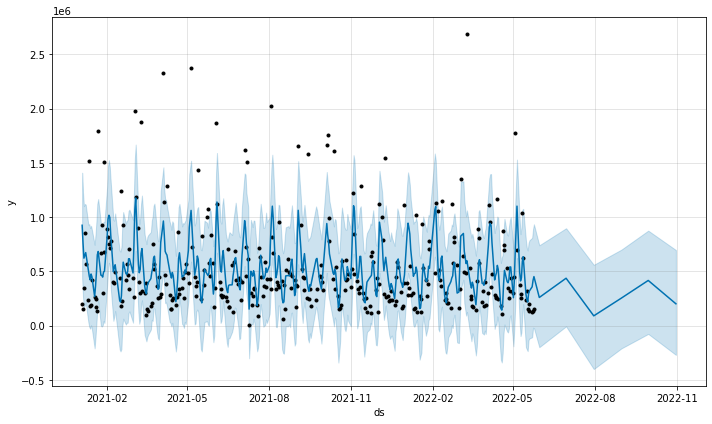

In [25]:
prophet.plot(forecast)
plt.savefig('chart1.jpg')

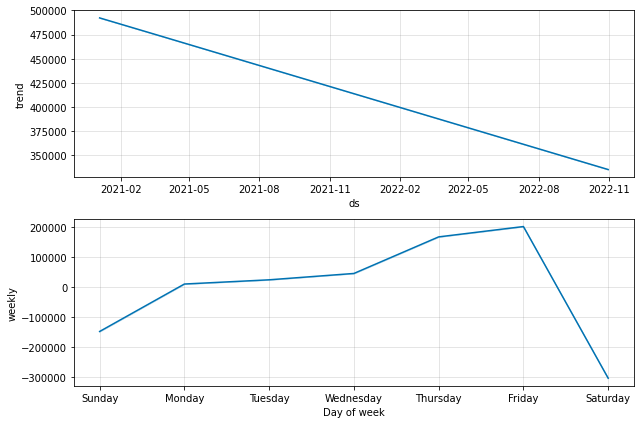

In [ ]:
prophet.plot_components(forecast)
plt.savefig('chart2.jpg')